# Importing Libraries & Tools

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Dataset

In [16]:
df=pd.read_csv("C:/Users/user/Desktop/DS Project/fake_job_postings.csv", index_col="job_id") 

In [17]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,,,
1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [18]:
df.shape

(17880, 17)

In [19]:
df.dtypes

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [20]:
df.duplicated().value_counts()

False    17599
True       281
dtype: int64

In [21]:
df[df.fraudulent==0].duplicated().value_counts(normalize=True)

False    0.984072
True     0.015928
dtype: float64

In [22]:
df[df.fraudulent==1].duplicated().value_counts(normalize=True)

False    0.988453
True     0.011547
dtype: float64

In [23]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [24]:
df.fraudulent.value_counts(normalize=True)

0    0.951566
1    0.048434
Name: fraudulent, dtype: float64

In [25]:
df.isna().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Data Exploration

For data exploration, I provisionally fill the null values with 'na', then separate the real and fake job ads to look into differences between them.

In [27]:
df_na=df.fillna('na') 

In [28]:
real=df_na[df_na.fraudulent==0]
real.describe(include='all')

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,17014,17014,17014,17014,17014,17014,17014,17014,17014.000000,17014.000000,17014.000000,17014,17014,17014,17014,17014,17014.0
unique,10730,2914,1270,829,1661,14171,11495,5904,NaN,NaN,NaN,6,8,14,131,38,NaN
top,English Teacher Abroad,"GB, LND, London",na,na,na,"Play with kids, get paid for it Love travel? J...",na,na,NaN,NaN,NaN,Full-time,na,na,na,na,NaN
freq,311,716,11016,14369,2721,379,2541,6847,NaN,NaN,NaN,11130,6615,7654,4628,6118,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041319,0.819149,0.502057,NaN,NaN,NaN,NaN,NaN,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.199033,0.384906,0.500010,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.0


In [29]:
fake=df_na[df_na.fraudulent==1]
fake.describe(include='all')

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,866,866,866,866,866,866,866,866,866.000000,866.000000,866.000000,866,866,866,866,866,866.0
unique,560,374,104,118,50,632,479,308,NaN,NaN,NaN,6,8,11,63,28,NaN
top,Data Entry Admin/Clerical Positions - Work Fro...,"US, TX, Houston",na,na,na,We are a full-service marketing and staffing f...,na,na,NaN,NaN,NaN,Full-time,na,na,na,na,NaN
freq,21,92,531,643,587,22,154,364,NaN,NaN,NaN,490,435,451,275,337,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073903,0.326790,0.288684,NaN,NaN,NaN,NaN,NaN,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.261764,0.469311,0.453412,NaN,NaN,NaN,NaN,NaN,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,1.0


In [30]:
na_rates=pd.DataFrame([col, len(real.loc[real[col]=='na'])/len(real[col]), len(fake.loc[fake[col]=='na'])/len(fake[col]) ] for col in df.columns)

In [31]:
na_rates.columns=['column','real_na_rates','fake_na_rates']

In [32]:
na_rates

,column,real_na_rates,fake_na_rates
0,title,0.000000,0.000000
1,location,0.019219,0.021940
2,department,0.647467,0.613164
3,salary_range,0.844540,0.742494
4,company_profile,0.159927,0.677829
5,description,0.000000,0.001155
6,requirements,0.149348,0.177829
7,benefits,0.402433,0.420323
8,telecommuting,0.000000,0.000000
9,has_company_logo,0.000000,0.000000


From the table we can see in all but one feature which has missing values, the fake ads are more likely to have missing values, with the exception of "salary range", in which fake ads are more likely to provide information. But are these differences of missing value rates statistically significant? I perform two proportion z-test on each of them, with the two-tailed p-value significance level setting at 0.005.



In [33]:
from statsmodels.stats.proportion import proportions_ztest
for col in df.columns:
    counts=np.array([len(real.loc[real[col]=='na']), len(fake.loc[fake[col]=='na'])])
    nobs=np.array([len(real[col]), len(fake[col])])
    if (counts.sum() !=0) and (nobs.sum() !=0):
        na_rates.loc[na_rates.column==col,'zstat'], na_rates.loc[na_rates.column==col,'p_value']=proportions_ztest(count=counts, nobs=nobs,  alternative='two-sided')

In [34]:
na_rates['significant_diff']=na_rates['p_value']<0.005

In [35]:
na_rates

,column,real_na_rates,fake_na_rates,zstat,p_value,significant_diff
0,title,0.000000,0.000000,NaN,NaN,False
1,location,0.019219,0.021940,-0.566910,5.707753e-01,False
2,department,0.647467,0.613164,2.058905,3.950329e-02,False
3,salary_range,0.844540,0.742494,7.982358,1.435640e-15,True
4,company_profile,0.159927,0.677829,-38.286984,0.000000e+00,True
5,description,0.000000,0.001155,-4.432578,9.311288e-06,True
6,requirements,0.149348,0.177829,-2.285189,2.230177e-02,False
7,benefits,0.402433,0.420323,-1.046881,2.951542e-01,False
8,telecommuting,0.000000,0.000000,NaN,NaN,False
9,has_company_logo,0.000000,0.000000,NaN,NaN,False


The Z-tests indicate that differences of na-rates among real and fake job-postings are mostly statistically significant, except in 'location', 'department', 'benefits' and 'function'. The difference is largest in company profile, where 68% of fake ads do not have a company profile, but only 16.1% of real ads omit company profiles.

## Length of Text Fields

examine the length of text fields in real and fake ads.

In [36]:
df_na['company_profile_length']=df_na.apply(lambda row: len(row.company_profile), axis=1)
df_na['description_length']=df_na.apply(lambda row: len(row.description), axis=1)
df_na['requirements_length']=df_na.apply(lambda row: len(row.requirements), axis=1)
df_na['benefits_length']=df_na.apply(lambda row: len(row.benefits), axis=1)
df_na['total_text_length']=df_na['company_profile_length']+df_na['description_length']+df_na['requirements_length']+df_na['benefits_length']

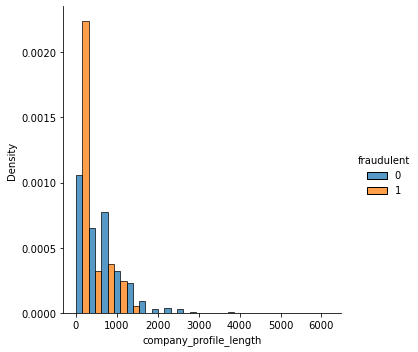

In [37]:
sns.displot(df_na, x='company_profile_length', hue='fraudulent', stat='density', bins=20, common_norm=False, multiple='dodge')

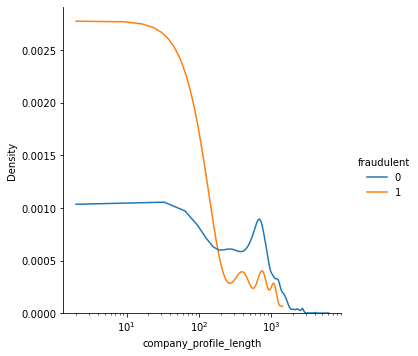

In [38]:
ax=sns.displot(df_na, x='company_profile_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

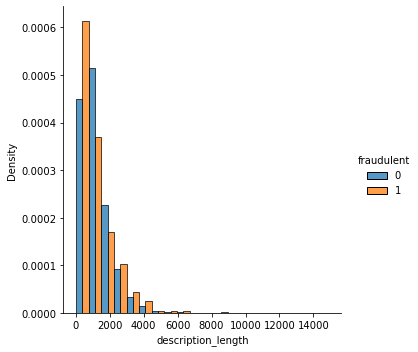

In [39]:
sns.displot(df_na, x='description_length', hue='fraudulent', stat='density', bins=20, common_norm=False, multiple='dodge')

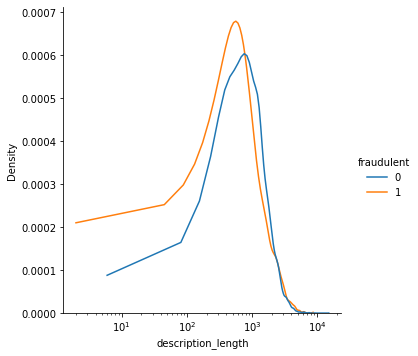

In [40]:
ax=sns.displot(df_na, x='description_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

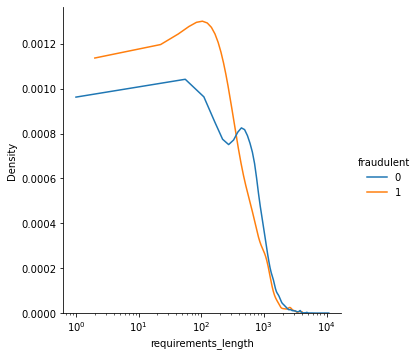

In [41]:
ax=sns.displot(df_na, x='requirements_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

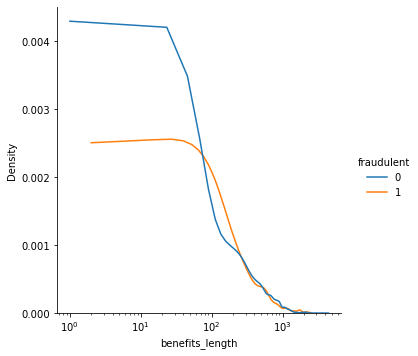

In [42]:
ax=sns.displot(df_na, x='benefits_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

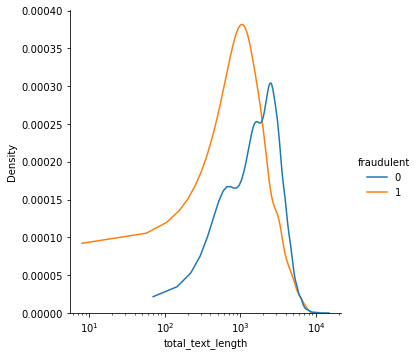

In [43]:
ax=sns.displot(df_na, x='total_text_length', hue='fraudulent', kind='kde', common_norm=False, cut=0)
ax.set(xscale="log")

And it is evidently clear that fake ads generally have shorter textual contents.

## Examination of Other Features 

The following graphs of three binary features show that ads of jobs involving telecommuting, do not have company logo and screening questions are more likely to be fake. Among the three features, the absence of company logo is the most indicative, with 16% of ads without company logo to be fake, while only 2% of ads with company logo are fraudulent.

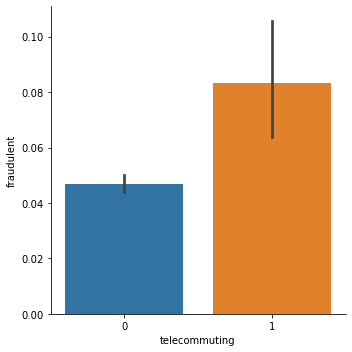

In [44]:
sns.catplot(data=df_na, y='fraudulent', x='telecommuting', kind='bar')

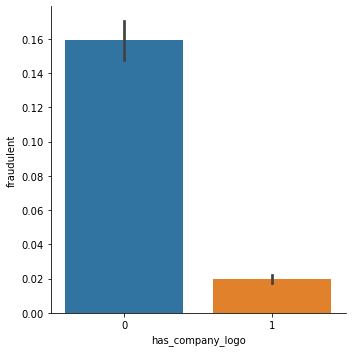

In [45]:
sns.catplot(data=df_na, y='fraudulent', x='has_company_logo', kind='bar')

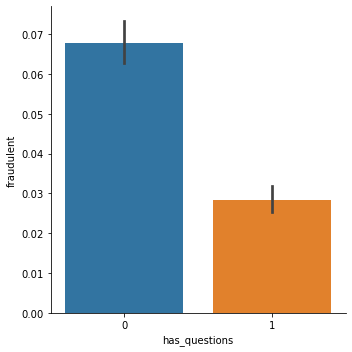

In [46]:
sns.catplot(data=df_na, y='fraudulent', x='has_questions', kind='bar')

In terms of employment type, ads which specify "full-time", "contract" and "temporary" are less likely to be fake. For required experience, ads which specify "associate","mid-senior level" and "internship" are less likely to be fake. And for required education, each category has more or less the same low fraudulent rates, with the exception of "some high school coursework", where the fraudulent rate is 75%. For function listed, "administrative" with a fraudulent rate about 20% stands out.

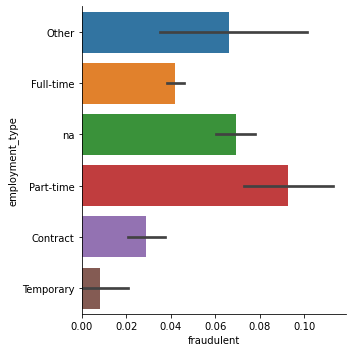

In [47]:
sns.catplot(data=df_na, x='fraudulent', y='employment_type', kind='bar')

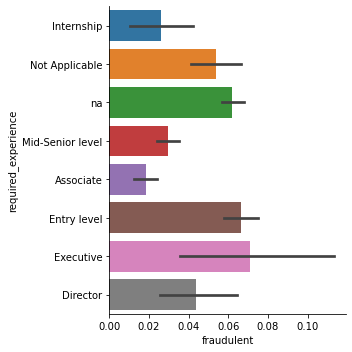

In [48]:
sns.catplot(data=df_na, x='fraudulent', y='required_experience', kind='bar')

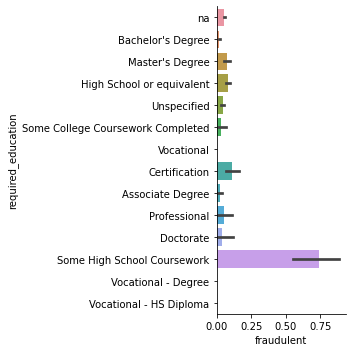

In [49]:
sns.catplot(data=df_na, x='fraudulent', y='required_education', kind='bar')

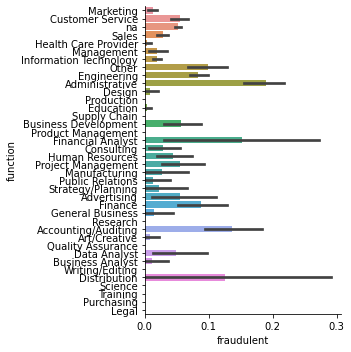

In [50]:
sns.catplot(data=df_na, x='fraudulent', y='function', kind='bar')

As for the 131 categories of industry listed, the most common in fake ads is "oil and energy". Among ads in that industry, the fraud rate 37.8% is also among the highest, though some isolated cases make the fraud rates of some industries like ranching, military and animation even higher.

In [51]:
df_na.industry.value_counts()[:20]

na                                     4903
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Real Estate                             175
Accounting                              159
Construction                            158
E-Learning                              139
Management Consulting                   130
Design                                  129
Health, Wellness and Fitness            127
Staffing and Recruiting                 127
Name: industry, dtype: int64

In [52]:
fake.industry.value_counts()[:20]

na                                     275
Oil & Energy                           109
Accounting                              57
Hospital & Health Care                  51
Marketing and Advertising               45
Financial Services                      35
Information Technology and Services     32
Telecommunications                      26
Consumer Services                       24
Real Estate                             24
Leisure, Travel & Tourism               21
Health, Wellness and Fitness            15
Hospitality                             14
Computer Networking                     12
Staffing and Recruiting                  8
Insurance                                6
Human Resources                          6
Management Consulting                    6
Computer & Network Security              5
Entertainment                            5
Name: industry, dtype: int64

In [53]:
real.industry.value_counts()[:20]

na                                     4628
Information Technology and Services    1702
Computer Software                      1371
Internet                               1062
Education Management                    822
Marketing and Advertising               783
Financial Services                      744
Hospital & Health Care                  446
Consumer Services                       334
Telecommunications                      316
Retail                                  218
Oil & Energy                            178
Construction                            155
Real Estate                             151
E-Learning                              137
Design                                  125
Management Consulting                   124
Staffing and Recruiting                 119
Insurance                               117
Automotive                              115
Name: industry, dtype: int64

In [54]:
industry=pd.crosstab(df_na.industry, df_na.fraudulent, normalize='index', margins=True)
industry.iloc[:,1].sort_values(ascending=False)[:20].to_frame(name='fraud rates')

,fraud rates
industry,
Ranching,1.000000
Military,0.500000
Animation,0.400000
Oil & Energy,0.379791
Accounting,0.358491
"Leisure, Travel & Tourism",0.276316
Computer Networking,0.272727
Executive Office,0.250000
Defense & Space,0.222222


The examination of title again reveals that some fake jobs ads emphasise money earned in dollar sign. 6.8% of fake ads have this characteristic, but only 0.4% of real ads do so.

In [55]:
df_na.title.value_counts()[:20]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Customer Service Representative                        51
Administrative Assistant                               48
Product Manager                                        47
Office Manager                                         46
Marketing Manager                                      45
Customer Servi

In [56]:
real.title.value_counts()[:20]

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Beauty & Fragrance consultants needed                  60
Graduates: English Teacher Abroad                      57
Product Manager                                        47
Marketing Manager                                      45
Office Manager                                         44
Web Designer                                           44
Customer Service Associate                             44
iOS Developer 

In [57]:
fake.title.value_counts()[:20]

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Data Entry                                                               9
Agency Sales Managers $150-$175,000/yr                                   9
 Payroll Data Entry Clerk Position - Earn $100-$200 Daily                6
Lawn and Maintenance Cont

In [58]:
fake.title.str.contains('$', regex=False).value_counts(normalize=True)

False    0.933025
True     0.066975
Name: title, dtype: float64

In [59]:
real.title.str.contains('$', regex=False).value_counts(normalize=True)

False    0.995768
True     0.004232
Name: title, dtype: float64

## Preliminary Textual Analysis 

Then I join the open textual fields for analysis. The first thing to consider is checking whether external links are characteristics of fake job ads. Comparisons reveal while real and fake ads have #URL links in more or less same rates, 20% of fake ads have #EMAIL links but less than 7% of real ads do so, and 9.2% of fake ads have #PHONE links while only 2.6% of real ads have them.

In [60]:
real_text=real.title+' '+real.company_profile+' '+real.description+' '+real.requirements+' '+real.benefits

In [61]:
real_text_frame=real_text.to_frame(name='text')

In [62]:
fake_text=fake.title+' '+fake.company_profile+' '+fake.description+' '+fake.requirements+' '+fake.benefits

In [63]:
fake_text_frame=fake_text.to_frame(name='text')

In [64]:
fake_text.str.contains('#URL', regex=False).value_counts(normalize=True)

False    0.691686
True     0.308314
dtype: float64

In [65]:
real_text.str.contains('#URL', regex=False).value_counts(normalize=True)

False    0.685318
True     0.314682
dtype: float64

In [66]:
fake_text.str.contains('#EMAIL', regex=False).value_counts(normalize=True)

False    0.799076
True     0.200924
dtype: float64

In [67]:
real_text.str.contains('#EMAIL', regex=False).value_counts(normalize=True)

False    0.931762
True     0.068238
dtype: float64

In [68]:
fake_text.str.contains('#PHONE', regex=False).value_counts(normalize=True)

False    0.908776
True     0.091224
dtype: float64

In [69]:
real_text.str.contains('#PHONE', regex=False).value_counts(normalize=True)

False    0.973669
True     0.026331
dtype: float64

For text preprocessing, I use the function by Jiahao Weng. It includes remove HTML tags, remove extra whitespaces, convert accented characters to ASCII characters, expand contractions, remove special characters, lowercase all texts, convert number words to numeric form, remove numbers, remove stopwords and lemmatization. Then I look into the most common words in real and fake job ads.

In [73]:
from bs4 import BeautifulSoup
import spacy
import unidecode
from word2number import w2n
import contractions

In [74]:
nlp = spacy.load("en_core_web_sm")

# exclude words from spacy stopwords list
deselect_stop_words = ['no', 'not']
for w in deselect_stop_words:
    nlp.vocab[w].is_stop = False


def strip_html_tags(text):
    """remove html tags from text"""
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text(separator=" ")
    return stripped_text


def remove_whitespace(text):
    """remove extra whitespaces from text"""
    text = text.strip()
    return " ".join(text.split())


def remove_accented_chars(text):
    """remove accented characters from text, e.g. café"""
    text = unidecode.unidecode(text)
    return text


def expand_contractions(text):
    """expand shortened words, e.g. don't to do not"""
    text = contractions.fix(text)
    return text


def text_preprocessing(text, accented_chars=True, contractions=True, 
                       convert_num=True, extra_whitespace=True, 
                       lemmatization=True, lowercase=True, punctuations=True,
                       remove_html=True, remove_num=True, special_chars=True, 
                       stop_words=True):
    """preprocess text with default option set to true for all steps"""
    if remove_html == True: #remove html tags
        text = strip_html_tags(text)
    if extra_whitespace == True: #remove extra whitespaces
        text = remove_whitespace(text)
    if accented_chars == True: #remove accented characters
        text = remove_accented_chars(text)
    if contractions == True: #expand contractions
        text = expand_contractions(text)
    if lowercase == True: #convert all characters to lowercase
        text = text.lower()

    doc = nlp(text) #tokenise text

    clean_text = []
    
    for token in doc:
        flag = True
        edit = token.text
        # remove stop words
        if stop_words == True and token.is_stop and token.pos_ != 'NUM': 
            flag = False
        # remove punctuations
        if punctuations == True and token.pos_ == 'PUNCT' and flag == True: 
            flag = False
        # remove special characters
        if special_chars == True and token.pos_ == 'SYM' and flag == True: 
            flag = False
        # remove numbers
        if remove_num == True and (token.pos_ == 'NUM' or token.text.isnumeric()) \
        and flag == True:
            flag = False
        # convert number words to numeric numbers
        if convert_num == True and token.pos_ == 'NUM' and flag == True:
            edit = w2n.word_to_num(token.text)
        # convert tokens to base form
        elif lemmatization == True and token.lemma_ != "-PRON-" and flag == True:
            edit = token.lemma_
        # append tokens edited and not removed to list 
        if edit != "" and flag == True:
            clean_text.append(edit)        
    return clean_text

In [75]:
real_text_frame['clean']=real_text_frame.apply(lambda x: text_preprocessing(x['text']), axis=1)
real_text_frame['clean']=real_text_frame.apply(lambda x: " ".join(x['clean']), axis=1)

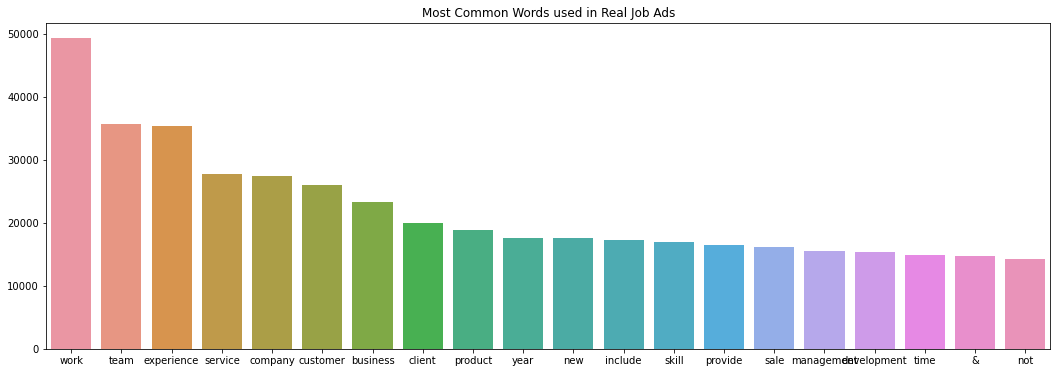

In [76]:
from collections import Counter

real_total_text = [text for text in real_text_frame['clean']]
real_total_text = ' '.join(real_total_text).split()

real_counts = Counter(real_total_text)

real_common_words = [word[0] for word in real_counts.most_common(20)]
real_common_counts = [word[1] for word in real_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=real_common_words, y=real_common_counts)
plt.title('Most Common Words used in Real Job Ads')
plt.show()

In [77]:
fake_text_frame['clean']=fake_text_frame.apply(lambda x: text_preprocessing(x['text']), axis=1)
fake_text_frame['clean']=fake_text_frame.apply(lambda x: " ".join(x['clean']), axis=1)

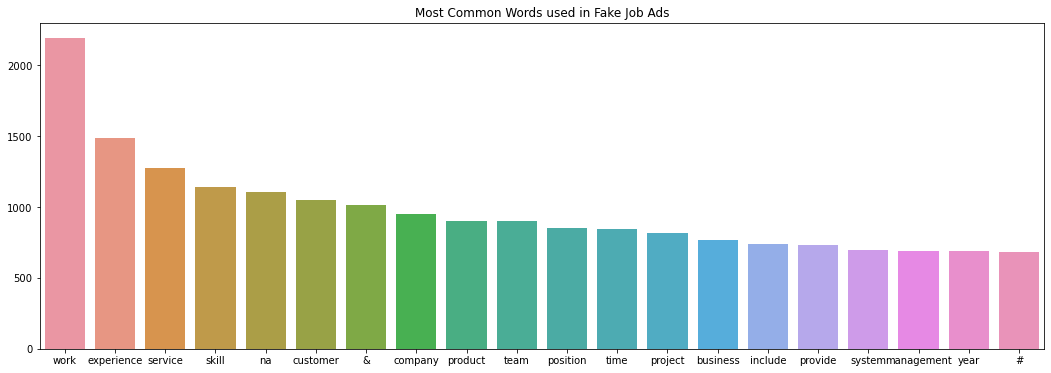

In [78]:
from collections import Counter

fake_total_text = [text for text in fake_text_frame['clean']]
fake_total_text = ' '.join(fake_total_text).split()

fake_counts = Counter(fake_total_text)

fake_common_words = [word[0] for word in fake_counts.most_common(20)]
fake_common_counts = [word[1] for word in fake_counts.most_common(20)]

fig = plt.figure(figsize=(18,6))
sns.barplot(x=fake_common_words, y=fake_common_counts)
plt.title('Most Common Words used in Fake Job Ads')
plt.show()

In this preliminary analysis it is not apparent that any keywords can separate real ads and fake ads, as most common words such as "work", "experience", "service" and "skill" are featured in both classes of text. A bag-of-words analysis should be better in doing this job. But it is noticeable that the dummy word "na" for missing values is featured high in the most common words list in fake ads.

# Feature Construction

For the missing values, in categorical fields "na" would be used as a category, but in the combined text it is replaced by empty space to avoid overlapping with the newly created features denoting absence of values. Furthermore, the less frequently appeared countries in the location column are simplified as "other".

In [79]:
finaldf=df.copy()

In [80]:
finaldf['missing_company_profile']=finaldf.company_profile.isnull().astype(int)

In [81]:
finaldf['missing_salary_range']=finaldf.company_profile.isnull().astype(int)

In [82]:
finaldf.fillna('na', inplace=True)

In [83]:
text_columns=['title','company_profile','description','requirements','benefits']
for column in text_columns:
    finaldf.loc[finaldf[column]=='na', column]=' '

In [84]:
finaldf['title_mention_$']=finaldf.title.str.contains('$', regex=False).astype(int)

In [85]:
def location_transform(location):
    country_list=['US','GB','CA','DE','NZ','AU','IN','MY','na']
    country=location[:2]
    if country in country_list:
        return country
    else:
        return 'other'

In [86]:
finaldf.location=finaldf.apply(lambda x: location_transform(x['location']), axis=1)

In [87]:
finaldf.location.value_counts()

US       10656
other     2810
GB        2384
CA         457
DE         383
na         346
NZ         333
IN         276
AU         214
MY          21
Name: location, dtype: int64

In [88]:
finaldf['text']=finaldf.title+' '+finaldf.company_profile+' '+finaldf.description+' '+finaldf.requirements+' '+finaldf.benefits
finaldf['email_link']=finaldf.text.str.contains('#EMAIL', regex=False).astype(int)
finaldf['phone_link']=finaldf.text.str.contains('#PHONE', regex=False).astype(int)

In [89]:
import math
finaldf['text_length']=finaldf.apply(lambda x: math.log(len(x['text'])+1), axis=1) 
#putting the length in logarithm to transform the skew distribution, add one to avoid the error of log(0)

In [90]:
# creating the "cleaned text" column
finaldf['cleaned_text']=finaldf.apply(lambda x: text_preprocessing(x['text']), axis=1)
finaldf['cleaned_text']=finaldf.apply(lambda x: " ".join(x['cleaned_text']), axis=1)

In [135]:
finaldf

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,text,email_link,phone_link,text_length,cleaned_text,bow_svm_predict_full,bow_rf_predict_full,xgbc_predict_full,ensemble_total,ensemble_predict
job_id,,,,,,,,,,,,,,,,,,,,,
1,Marketing Intern,US,Marketing,na,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,...,"Marketing Intern We're Food52, and we've creat...",0,0,7.887584,marketing intern food52 create groundbreaking ...,0,0,0,0,0
2,Customer Service - Cloud Video Production,NZ,Success,na,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,Customer Service - Cloud Video Production 90 S...,0,0,8.721602,customer service cloud video production second...,0,0,0,0,0
3,Commissioning Machinery Assistant (CMA),US,na,na,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,...,Commissioning Machinery Assistant (CMA) Valor ...,0,0,7.879291,commission machinery assistant cma valor servi...,0,0,0,0,0
4,Account Executive - Washington DC,US,Sales,na,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,Account Executive - Washington DC Our passion ...,0,0,8.605753,account executive washington dc passion improv...,0,0,0,0,0
5,Bill Review Manager,US,na,na,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,Bill Review Manager SpotSource Solutions LLC i...,0,1,8.281471,bill review manager spotsource solution llc gl...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,CA,Sales,na,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,...,Account Director - Distribution Vend is looki...,0,0,8.578665,account director distribution vend look awesom...,0,0,0,0,0
17877,Payroll Accountant,US,Accounting,na,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,...,Payroll Accountant WebLinc is the e-commerce p...,0,0,8.464003,payroll accountant weblinc e - commerce platfo...,0,0,0,0,0
17878,Project Cost Control Staff Engineer - Cost Con...,US,na,na,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,...,Project Cost Control Staff Engineer - Cost Con...,0,0,7.944137,project cost control staff engineer cost contr...,0,0,0,0,0


In [92]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

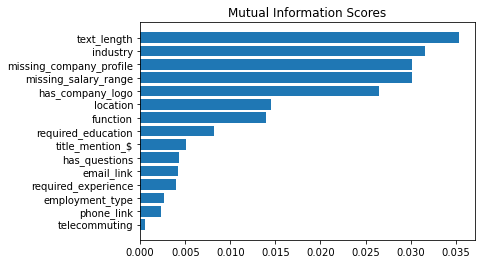

In [93]:
feature_set=['location','missing_salary_range','missing_company_profile','telecommuting','has_company_logo','has_questions',
             'employment_type','required_experience','required_education','industry','function','title_mention_$',
             'email_link','phone_link','text_length']
scores=make_mi_scores(finaldf[feature_set], finaldf['fraudulent'])
plot_mi_scores(scores)

Mutual information scores show that among the non-textual features, "text length", "industry", "missing company profile", "missing salary range" and "has company logo" are the top 5 features that have a relationship with fake job ads.

Then we do one-hot-encoding with the categorical features, make the final features set as X, and separate the column "fraudulent" as y.

In [94]:
finaldf_getdummy=pd.get_dummies(data=finaldf, columns=['location','employment_type','required_experience',
                                                       'required_education','industry','function'])

In [95]:
finaldf_getdummy

,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing,function_na
job_id,,,,,,,,,,,,,,,,,,,,,
1,Marketing Intern,Marketing,na,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Customer Service - Cloud Video Production,Success,na,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Commissioning Machinery Assistant (CMA),na,na,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,Account Executive - Washington DC,Sales,na,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,Bill Review Manager,na,na,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,Sales,na,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,...,0,0,0,1,0,0,0,0,0,0
17877,Payroll Accountant,Accounting,na,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,...,0,0,0,0,0,0,0,0,0,0
17878,Project Cost Control Staff Engineer - Cost Con...,na,na,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
X=finaldf_getdummy.drop(['fraudulent','title','department','salary_range','company_profile','description','requirements','benefits'], axis=1)
y=finaldf_getdummy['fraudulent']

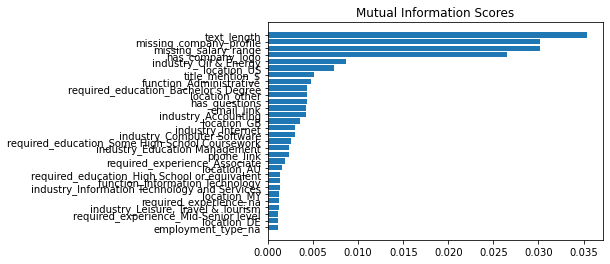

In [97]:
scores=make_mi_scores(X,y)[2:32]
plot_mi_scores(scores)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=50, stratify=y)

In [100]:
X_train1=X_train[y_train==0].iloc[0::3].append(X_train[y_train==1])
X_train2=X_train[y_train==0].iloc[1::3].append(X_train[y_train==1])
X_train3=X_train[y_train==0].iloc[2::3].append(X_train[y_train==1])

In [103]:
y_train1=y_train[y_train==0].iloc[0::3].append(y_train[y_train==1])
y_train2=y_train[y_train==0].iloc[1::3].append(y_train[y_train==1])
y_train3=y_train[y_train==0].iloc[2::3].append(y_train[y_train==1])

In [104]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=0.6, random_state= 42)
X_train1_resampled, y_train1_resampled = ros.fit_resample(X_train1, y_train1)
X_train2_resampled, y_train2_resampled = ros.fit_resample(X_train2, y_train2)
X_train3_resampled, y_train3_resampled = ros.fit_resample(X_train3, y_train3)

# SVM BoW Model

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

vectorizer = CountVectorizer(ngram_range=(1,2)) # looking for both unigrams and bigrams
clf = LinearSVC(C=0.01, class_weight='balanced', random_state=42)
bowpipe = Pipeline([('vectorizer', vectorizer), ('clf', clf)])
bowpipe.fit(X_train1_resampled['cleaned_text'], y_train1_resampled)
bow_predict = bowpipe.predict(X_test['cleaned_text'])

In [189]:
from sklearn.metrics import accuracy_score, classification_report
print("accuracy:", accuracy_score(y_test, bow_predict))
print(classification_report(y_test, bow_predict))

accuracy: 0.9765100671140939
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4254
           1       0.72      0.85      0.78       216

    accuracy                           0.98      4470
   macro avg       0.85      0.92      0.88      4470
weighted avg       0.98      0.98      0.98      4470



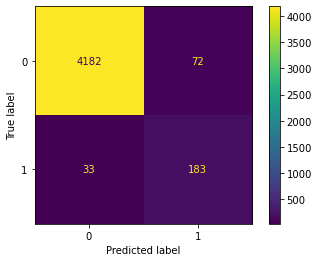

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_bow=confusion_matrix(y_test, bow_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_bow)
disp.plot()
plt.show()

In [191]:
def printNMostInformative(vectorizer, clf, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    topClass0 = coefs_with_fns[:N]
    topClass1 = coefs_with_fns[:-(N + 1):-1]
    print("Class 0 best: ")
    for feat in topClass0:
        print(feat)
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)

print("Top 30 features used to predict: ")
printNMostInformative(vectorizer, clf, 30)
transform = vectorizer.fit_transform(X_train1_resampled['cleaned_text'], y_train1_resampled)

vocab = vectorizer.get_feature_names()
for i in range(len(X_train1_resampled['cleaned_text'])):
    s = ""
    indexIntoVocab = transform.indices[transform.indptr[i]:transform.indptr[i+1]]
    numOccurences = transform.data[transform.indptr[i]:transform.indptr[i+1]]
    for idx, num in zip(indexIntoVocab, numOccurences):
        s += str((vocab[idx], num))

Top 30 features used to predict: 
Class 0 best: 
(-0.10869079425322477, 'english')
(-0.09105120183964446, 'digital')
(-0.08218748309801872, 'startup')
(-0.07956797616800289, 'driver')
(-0.07572153636429363, 'oracle')
(-0.0723818494964548, 'order')
(-0.07120735411050824, 'developer')
(-0.07042179459749942, 'agency')
(-0.0687736662714827, 'medium')
(-0.06792369951281095, 'infrastructure')
(-0.06757513840027618, 'client')
(-0.0670519477932486, 'recruitment')
(-0.0649282689220866, 'web')
(-0.0646444841991225, 'sell')
(-0.06336285468233835, 'year')
(-0.06271998262722114, 'business')
(-0.06233494254970269, 'fast')
(-0.06218754613223965, 'previous')
(-0.06044913809573476, 'university')
(-0.06038680126861158, 'degree')
(-0.05821662745897838, 'social')
(-0.0579022201430764, 'experienced')
(-0.05783840446582203, 'class')
(-0.05749570243808319, 'caregiver')
(-0.05712521900151681, 'teacher')
(-0.056951934964222295, 'end')
(-0.055012684222705055, 'search')
(-0.054739214359738324, 'etc')
(-0.0544609

A bag-of-word model simply keeps counts of occurance of each word in the text. By feeding it into a machine learning algorithm, we hope the algorithm can identify keywords that can distinguish fake job ads from the real ones. Linear SVM is known to be working quickly on high dimensional data and is highly interpretable. I use Susan Li's function for listing the top textual features used for predictions, and it reveals that some of the words raised in earlier discussion like "earn", "immediate", "cash", "money", "apply link", "phone", "work home" emerge as keywords for predictions, while certain top words related to "northwestern hospital build website" apparently learned from a series of fake ads in the sample.

In [268]:
X_train4_resampled, y_train4_resampled = ros.fit_resample(X_train, y_train)

# Random Forest TF-IDF BoW Model

In [312]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

t_vectorizer = TfidfVectorizer(ngram_range=(1,2))
t_clf = RandomForestClassifier(class_weight='balanced', random_state=42)
t_bowpipe = Pipeline([('vectorizer', t_vectorizer), ('clf', t_clf)])
t_bowpipe.fit(X_train4_resampled['cleaned_text'], y_train4_resampled)
t_bow_predict = t_bowpipe.predict(X_test['cleaned_text'])

In [313]:
print("accuracy:", accuracy_score(y_test, t_bow_predict))
print(classification_report(y_test, t_bow_predict))

accuracy: 0.9812080536912752
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4254
           1       0.97      0.63      0.76       216

    accuracy                           0.98      4470
   macro avg       0.98      0.81      0.88      4470
weighted avg       0.98      0.98      0.98      4470



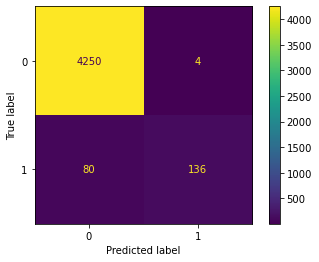

In [314]:
cm_t_bow=confusion_matrix(y_test, t_bow_predict)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_t_bow)
disp.plot()
plt.show()

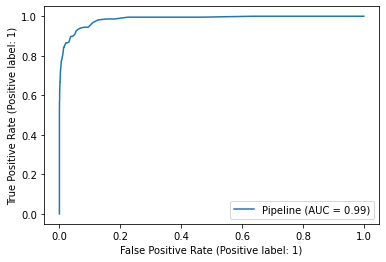

In [356]:
rf_disp = RocCurveDisplay.from_estimator(t_bowpipe, X_test['cleaned_text'], y_test)
plt.show()

In [315]:
import eli5
eli5.explain_weights(t_bowpipe, vec=t_vectorizer, top=30, targets=y_train2_resampled)

Weight,Feature
0.0043 ± 0.0224,team
0.0027 ± 0.0228,position
0.0025 ± 0.0194,fun
0.0025 ± 0.0197,passionate
0.0023 ± 0.0150,time
0.0020 ± 0.0122,industry
0.0020 ± 0.0191,earn
0.0019 ± 0.0084,experience
0.0019 ± 0.0177,medium
0.0019 ± 0.0119,drive


TD-IDF(term frequency–inverse document frequency) changes the word counts of BoW model by suppressing the importance of words occurring across texts, thus concentrating on unique words that appear frequently in a particular text. The eli5 library can reveal the textual features carry the most weight i the random forest model, but don't distinguish whether they are used to predict real or fake ads, but we can see certain words like "earn", "work home", "no experience" appear again. And compared with the SVM BoW model, which has more false positives than false negatives, the random forest TF-IDF BoW Model has more false negatives than false positives.

# SVM with TFIDF

In [316]:
t_vectorizer_1 = TfidfVectorizer(ngram_range=(1,2))
clf_1 = LinearSVC(C=0.01, class_weight='balanced', random_state=42)
svm_tf = Pipeline([('vectorizer', t_vectorizer_1), ('clf', clf_1)])
svm_tf.fit(X_train4_resampled['cleaned_text'], y_train4_resampled)
svm_predict_tf = svm_tf.predict(X_test['cleaned_text'])

In [317]:
print("accuracy:", accuracy_score(y_test,svm_predict_tf))
print(classification_report(y_test, svm_predict_tf))

accuracy: 0.980089485458613
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4254
           1       0.76      0.85      0.81       216

    accuracy                           0.98      4470
   macro avg       0.88      0.92      0.90      4470
weighted avg       0.98      0.98      0.98      4470



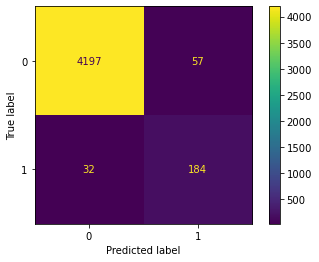

In [318]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_bow=confusion_matrix(y_test, svm_predict_tf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_bow)
disp.plot()
plt.show()

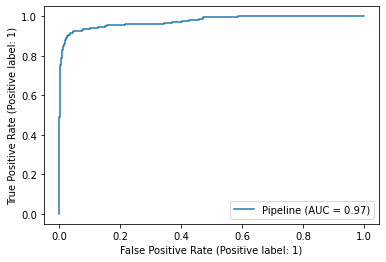

In [343]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(svm_tf, X_test['cleaned_text'], y_test)
plt.show()

# Logistic Regression with TFIDF

In [269]:
t_vectorizer_2 = TfidfVectorizer(ngram_range=(1,2))
clf_lr = LogisticRegression()

# Create pipeline using Bag of Words
lr_tf = Pipeline([('vectorizer', t_vectorizer_2), ('clf', clf_lr)])


# fitting our model.
lr_tf.fit(X_train4_resampled['cleaned_text'], y_train4_resampled)
lr_predict_tf = lr_tf.predict(X_test['cleaned_text'])

In [270]:
print("accuracy:", accuracy_score(y_test, lr_predict_tf))
print(classification_report(y_test, lr_predict_tf))

accuracy: 0.9865771812080537
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4254
           1       0.92      0.79      0.85       216

    accuracy                           0.99      4470
   macro avg       0.95      0.89      0.92      4470
weighted avg       0.99      0.99      0.99      4470



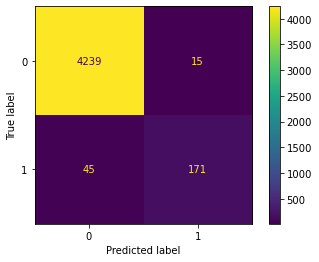

In [271]:
cm_lr=confusion_matrix(y_test, lr_predict_tf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp.plot()
plt.show()

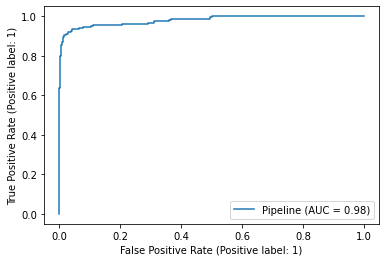

In [348]:
lr_disp = RocCurveDisplay.from_estimator(lr_tf, X_test['cleaned_text'], y_test)
plt.show()

# Decision Tree with TFIDF

In [280]:
from sklearn.tree import DecisionTreeClassifier

In [281]:
t_vectorizer_3 = TfidfVectorizer(ngram_range=(1,2))

clf_tree = DecisionTreeClassifier()

tree_tf = Pipeline([('vectorizer', t_vectorizer_3), ('clf', clf_tree)])
tree_tf.fit(X_train4_resampled['cleaned_text'], y_train4_resampled)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', DecisionTreeClassifier())])

In [282]:
tree_predict_tf = tree_tf.predict(X_test['cleaned_text'])

In [283]:
print("accuracy:", accuracy_score(y_test, tree_predict_tf))
print(classification_report(y_test, tree_predict_tf))

accuracy: 0.9659955257270694
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4254
           1       0.64      0.69      0.66       216

    accuracy                           0.97      4470
   macro avg       0.81      0.84      0.82      4470
weighted avg       0.97      0.97      0.97      4470



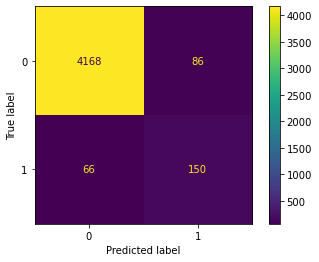

In [284]:
cm_tree=confusion_matrix(y_test, tree_predict_tf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_tree)
disp.plot()
plt.show()

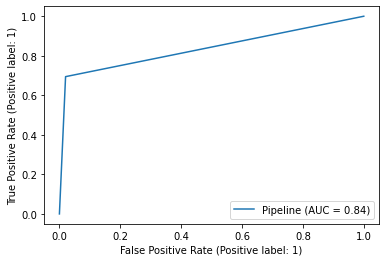

In [350]:
tree_disp = RocCurveDisplay.from_estimator(tree_tf, X_test['cleaned_text'], y_test)
plt.show()

# Multi-layer Perceptron

In [287]:
import sklearn.neural_network as sknet

t_vectorizer_4 = TfidfVectorizer(ngram_range=(1,2))

clf_mlp = sknet.MLPClassifier(hidden_layer_sizes=(100,), random_state=42)
mlp_tf = Pipeline([('vectorizer', t_vectorizer_4), ('clf', clf_mlp)])
mlp_tf.fit(X_train4_resampled['cleaned_text'], y_train4_resampled)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', MLPClassifier(random_state=42))])

In [351]:
mlp_predict_tf = mlp_tf.predict(X_test['cleaned_text'])

In [352]:
print("accuracy:", accuracy_score(y_test, mlp_predict_tf))
print(classification_report(y_test, mlp_predict_tf))

accuracy: 0.9854586129753915
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4254
           1       0.97      0.72      0.83       216

    accuracy                           0.99      4470
   macro avg       0.98      0.86      0.91      4470
weighted avg       0.99      0.99      0.98      4470



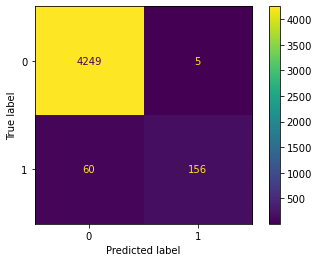

In [353]:
cm_mlp=confusion_matrix(y_test, mlp_predict_tf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_mlp)
disp.plot()
plt.show()

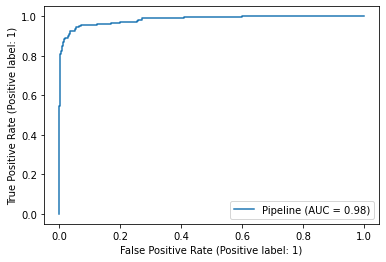

In [354]:
mlp_disp = RocCurveDisplay.from_estimator(mlp_tf, X_test['cleaned_text'], y_test)
plt.show()

# LGBM

In [296]:
import lightgbm as lgb
clf_lgbm = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)

t_vectorizer_5 = TfidfVectorizer(ngram_range=(1,2))

lgbm_tf = Pipeline([('vectorizer', t_vectorizer_5), ('clf', clf_lgbm)])
lgbm_tf.fit(X_train4_resampled['cleaned_text'], y_train4_resampled)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf',
                 LGBMClassifier(learning_rate=0.09, max_depth=-5,
                                random_state=42))])

In [297]:
lgbm_predict_tf = lgbm_tf.predict(X_test['cleaned_text'])

In [298]:
print("accuracy:", accuracy_score(y_test, lgbm_predict_tf))
print(classification_report(y_test, lgbm_predict_tf))

accuracy: 0.9838926174496644
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4254
           1       0.86      0.80      0.83       216

    accuracy                           0.98      4470
   macro avg       0.92      0.90      0.91      4470
weighted avg       0.98      0.98      0.98      4470



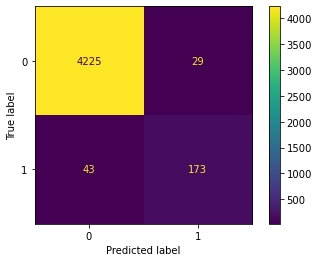

In [299]:
cm_lgbm=confusion_matrix(y_test, lgbm_predict_tf)
disp=ConfusionMatrixDisplay(confusion_matrix=cm_lgbm)
disp.plot()
plt.show()

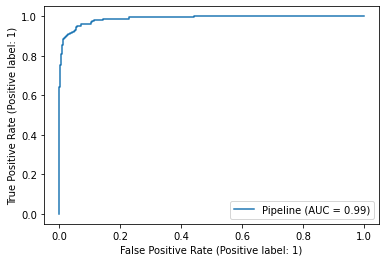

In [355]:
lgbm_disp = RocCurveDisplay.from_estimator(lgbm_tf, X_test['cleaned_text'], y_test)
plt.show()

# Testing

In [326]:
test_fake = "Competitive compensation package including base + full benefits package + expense account + per diem and increase in base + many perks.Clean, safe and professional working environment / culture. Â The management team has a great reputation for taking good care of employees. Â Steady, consistent employment opportunity- company has a history and reputation for the tenure of employees for the long-term. No layoffs or terminations. When work is slow the team always has work to keep current employees on a full-time status so you can feel confident your employment will be steady and something you can count on.Â If you like to travel and enjoy your independence, this position is for you. You will be traveling to multiple sites on overnight visits throughout the week and be working mostly independently.Â The position is available right away as we are prepared to move forward fairly quickly upon identifying the right candidate. Â Qualified candidates are encouraged to apply directly to this job posting. Â Direct email and phone calls are not being considered. Thank you for your cooperation. Â Please no recruiters. Â "

In [327]:
dftest=pd.DataFrame()
dftest['text']=[test_fake]
dftest['text'] = dftest.apply(lambda x: text_preprocessing(x['text']), axis=1)
dftest['text']=dftest.apply(lambda x: " ".join(x['text']), axis=1)

In [328]:
test_predict_bow = bowpipe.predict(dftest['text'])

In [329]:
test_predict_t_SVM = svm_tf.predict(dftest['text'])

In [330]:
test_predict_t_RF = t_bowpipe.predict(dftest['text'])

In [331]:
test_predict_t_LR = lr_tf.predict(dftest['text'])

In [332]:
print("Bow SVM - " ,test_predict_bow)
print("TFIDF SVM - " ,test_predict_t_SVM)
print("TFIDF RF - ", test_predict_t_RF)
print("TFIDF LR - ", test_predict_t_LR)

Bow SVM -  [1]
TFIDF SVM -  [1]
TFIDF RF -  [0]
TFIDF LR -  [1]


# Saving the model

In [337]:
import pickle
import joblib

In [338]:
filename1 = 'tfidf_SVM.pkl'
filename2 = 'tfidf_RF.pkl'
filename3 = 'tfidf_LR.pkl'
filename4 = 'cv_SVM.pkl'

In [340]:
#joblib.dump(svm_tf, filename1)
joblib.dump(t_bowpipe, filename2)
joblib.dump(lr_tf, filename3)
joblib.dump(bowpipe, filename4)

['cv_SVM.pkl']

In [ ]:
#when loading use this code
# joblib.load('filename.pkl')